In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_json("../log.ndjson", lines = True)
df = df.sort_values(by=["value_type","entry_count", "shrink_type"])
df.to_markdown("../this.md")
df

,entry_count,value_type,collection,capacity,ram_usage,shrink_type
7,1,BigStruct,hashmap,3.0,1961,AfterShrink
15,1,BigStruct,vector,1.0,1293,AfterShrink
19,1,BigStruct,vector_deque,1.0,1509,AfterShrink
2,1,BigStruct,nothing,NaN,1077,BeforeShrink
6,1,BigStruct,hashmap,3.0,1961,BeforeShrink
...,...,...,...,...,...,...
184,16384,EmptyStruct,vector_deque,32767.0,263221,BeforeShrink
188,16384,EmptyStruct,linked_list,NaN,394293,BeforeShrink
169,16384,EmptyStruct,nothing,NaN,1077,None
177,16384,EmptyStruct,btreemap,NaN,322037,None


/tmp/ipykernel_14577/2982539641.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _df = df[df.collection == i][df.value_type == val_type]


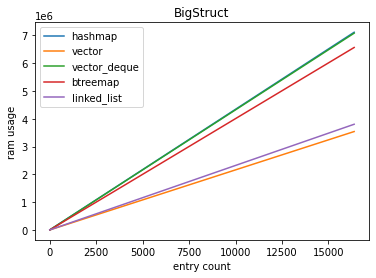

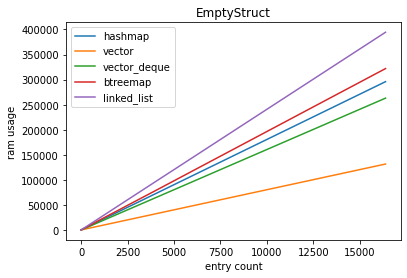

In [76]:
def show_plot(val_type, shrink_type):
    plt.title(val_type)
    for i in df.collection.unique():
        if i == "nothing": 
            continue

        _df = df[df.collection == i][df.value_type == val_type]
        for i2 in shrink_type:
            _df = _df[i2 == _df.shrink_type]
        

        plt.plot(_df.entry_count, _df.ram_usage, label=i)
        plt.xlabel("entry count")
        plt.ylabel("ram usage")
        plt.legend()

    plt.show()
    return

show_plot("BigStruct", ["BeforeShrink"])
show_plot("EmptyStruct",["BeforeShrink"])